# Alzheimer Classification with CNN

The project aims to develop a deep learning model using Convolutional Neural Networks (CNN) for the classification of Alzheimer's disease. Alzheimer's disease is a neurodegenerative disorder that affects memory, thinking, and behavior. Early and accurate diagnosis of Alzheimer's is crucial for providing timely medical interventions and improving patient outcomes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

In [2]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [3]:
dataset = r'C:\Users\DELL\Desktop\python project\New folder\maleria\Dataset'

In [4]:
os.listdir(dataset)

['Non_Demented', 'Very_Mild_Demented']

In [5]:
def convert_path_to_df(dataset):
    image_dir = Path(dataset)
    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.PNG'))
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

image_df = convert_path_to_df(dataset)

In [6]:
image_df.head()

,Filepath,Label
0,C:\Users\DELL\Desktop\python project\New folde...,Non_Demented
1,C:\Users\DELL\Desktop\python project\New folde...,Non_Demented
2,C:\Users\DELL\Desktop\python project\New folde...,Non_Demented
3,C:\Users\DELL\Desktop\python project\New folde...,Non_Demented
4,C:\Users\DELL\Desktop\python project\New folde...,Non_Demented


In [7]:
image_df.tail()

,Filepath,Label
7995,C:\Users\DELL\Desktop\python project\New folde...,Very_Mild_Demented
7996,C:\Users\DELL\Desktop\python project\New folde...,Very_Mild_Demented
7997,C:\Users\DELL\Desktop\python project\New folde...,Very_Mild_Demented
7998,C:\Users\DELL\Desktop\python project\New folde...,Very_Mild_Demented
7999,C:\Users\DELL\Desktop\python project\New folde...,Very_Mild_Demented


In [8]:
image_df.shape

(8000, 2)

In [9]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(dataset).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [10]:
image = r'C:\Users\DELL\Desktop\python project\New folder\maleria\Dataset\Non_Demented\non_25.jpg'

In [11]:
non_demented = imread(image)

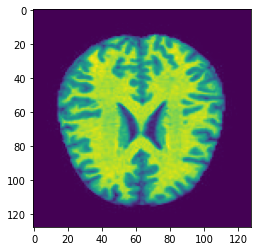

In [12]:
plt.imshow(non_demented)

In [13]:
non_demented.shape

(128, 128)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_df, test_df = train_test_split(
    image_df, 
    test_size = 0.2, 
    shuffle = True, 
    random_state = 42
)

In [16]:
train_df.shape, test_df.shape

((6400, 2), (1600, 2))

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [18]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255,
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

In [19]:
train_generator = ImageDataGenerator(
    validation_split = 0.2
)

In [21]:
train_image_gen = train_generator.flow_from_dataframe(
    train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset = 'training',
    shuffle = True
)

Found 5120 validated image filenames belonging to 2 classes.


In [22]:
val_images = train_generator.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 1280 validated image filenames belonging to 2 classes.


In [23]:
test_image_gen = image_gen.flow_from_dataframe(
    test_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle = True, 
    seed = 42
)

Found 1600 validated image filenames belonging to 2 classes.


In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224, 224, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224, 224, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224, 224, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [26]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience = 2, 
                           restore_best_weights = True)

In [27]:
checkpoint_path = "Alzheimer_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [28]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-10)

In [29]:
train_image_gen.class_indices

{'Non_Demented': 0, 'Very_Mild_Demented': 1}

In [30]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

def create_tensorboard_callback(log_dir, experiment_name):
    log_dir = log_dir + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [31]:
model.compile(optimizer = Adam(0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
model.fit(
    train_image_gen,
    steps_per_epoch=len(train_image_gen),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stop,
        create_tensorboard_callback("training_logs", 
                                    "Alzheimer_classification"),
        checkpoint_callback,
        reduce_lr
    ]
)

Saving TensorBoard log files to: training_logs/Alzheimer_classification/20230610-115148
Epoch 1/100
160/160 [==============================] - 737s 5s/step - loss: 0.6427 - accuracy: 0.6977 - val_loss: 0.4836 - val_accuracy: 0.7883 - lr: 1.0000e-04
Epoch 2/100
160/160 [==============================] - 456s 3s/step - loss: 0.4135 - accuracy: 0.8119 - val_loss: 0.3386 - val_accuracy: 0.8594 - lr: 1.0000e-04
Epoch 3/100
160/160 [==============================] - 761s 5s/step - loss: 0.2829 - accuracy: 0.8879 - val_loss: 0.2210 - val_accuracy: 0.9203 - lr: 1.0000e-04
Epoch 4/100
160/160 [==============================] - 467s 3s/step - loss: 0.1766 - accuracy: 0.9434 - val_loss: 0.1704 - val_accuracy: 0.9461 - lr: 1.0000e-04
Epoch 5/100
160/160 [==============================] - 721s 5s/step - loss: 0.1026 - accuracy: 0.9738 - val_loss: 0.0694 - val_accuracy: 0.9859 - lr: 1.0000e-04
Epoch 6/100
160/160 [==============================] - 441s 3s/step - loss: 0.0581 - accuracy: 0.9887 - val

In [33]:
model.save('alzheimer_classifier.h5')

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.642718,0.697656,0.483612,0.788281,0.0001
1,0.413503,0.811914,0.338564,0.859375,0.0001
2,0.282866,0.887891,0.220969,0.920313,0.0001
3,0.176649,0.943359,0.170423,0.946094,0.0001
4,0.102572,0.973828,0.069441,0.985937,0.0001


<AxesSubplot:>

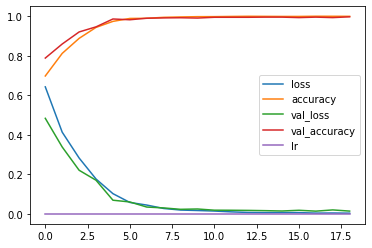

In [36]:
losses.plot()

<AxesSubplot:>

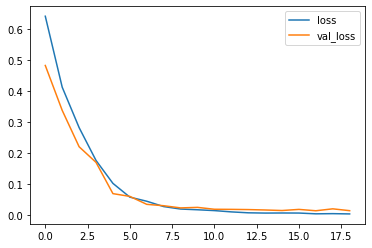

In [37]:
losses[['loss', 'val_loss']].plot()

<AxesSubplot:>

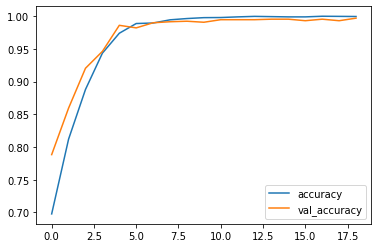

In [38]:
losses[['accuracy', 'val_accuracy']].plot()

In [40]:
pred = model.predict(test_image_gen)
pred = np.argmax(pred,axis=1)

50/50 [==============================] - 86s 2s/step


In [41]:
labels = (train_image_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

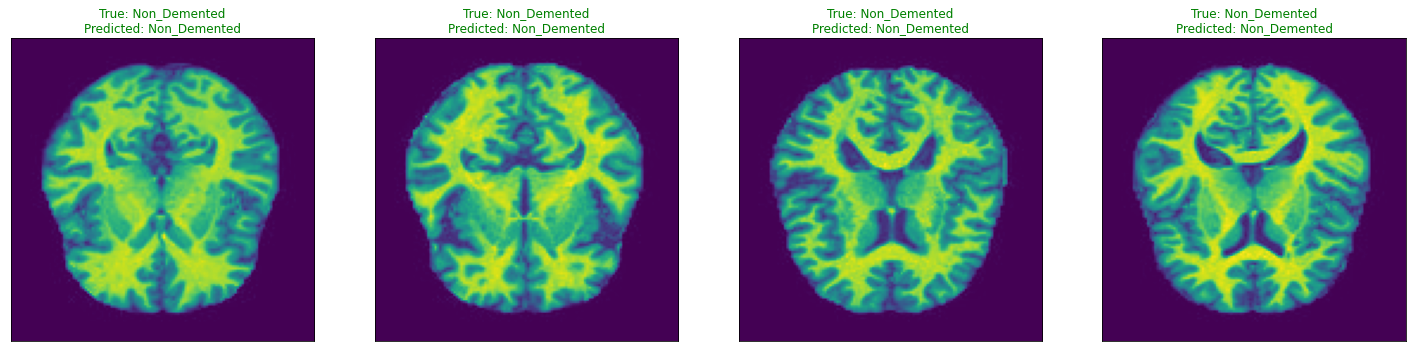

<Figure size 432x288 with 0 Axes>

In [58]:
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()